In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Dataset
[https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope]


In [2]:
pd.read_csv('magic04.data')

,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.011,-8.2027,40.092,81.8828,g
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
cols= ['flength','fwidth','fsize','fconc','fcon1','fasym','fM3long','fM3trans','falpha','fdist','class']
df = pd.read_csv('magic04.data', names=cols)
df.head()
df.tail()

,flength,fwidth,fsize,fconc,fcon1,fasym,fM3long,fM3trans,falpha,fdist,class
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h


In [4]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [5]:
df['class'] = (df['class'] == 'g').astype(int)

In [6]:
df.head()


,flength,fwidth,fsize,fconc,fcon1,fasym,fM3long,fM3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [7]:
df


,flength,fwidth,fsize,fconc,fcon1,fasym,fM3long,fM3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


#data preparation

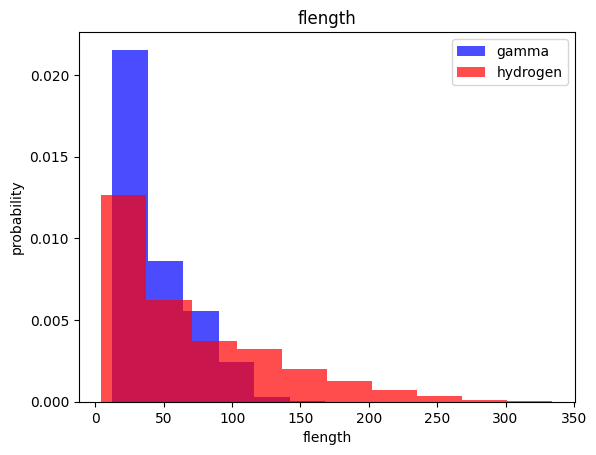

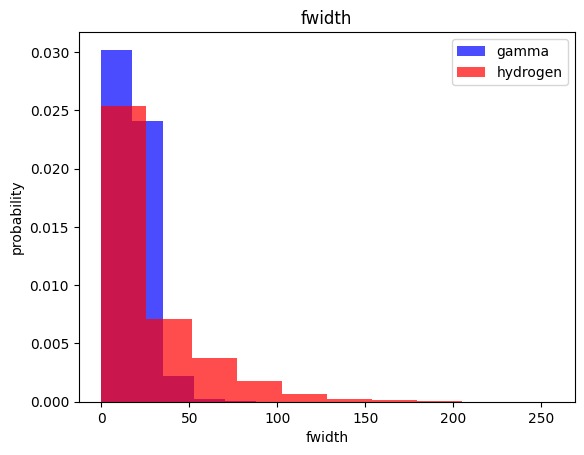

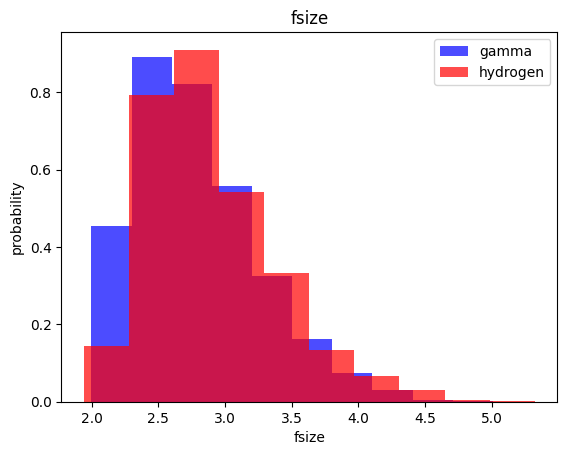

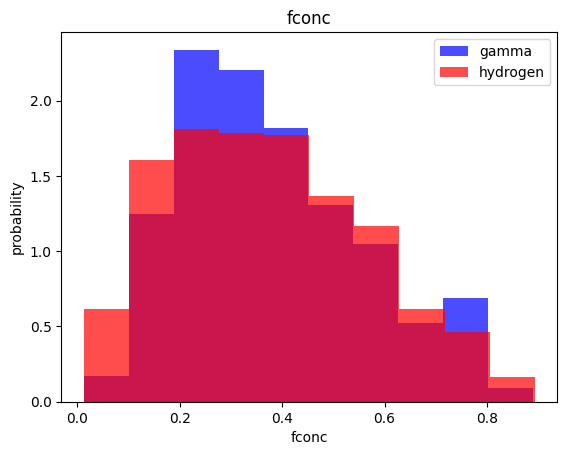

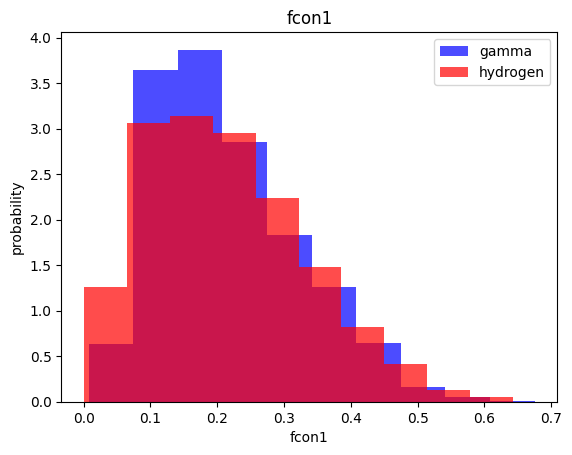

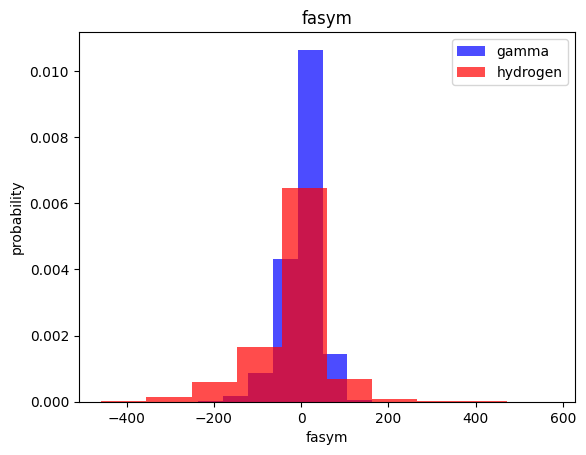

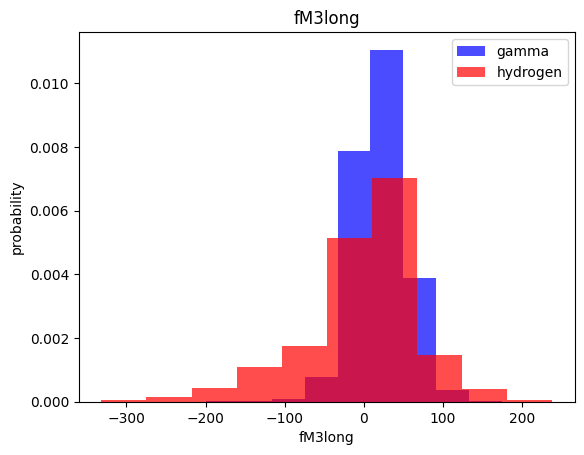

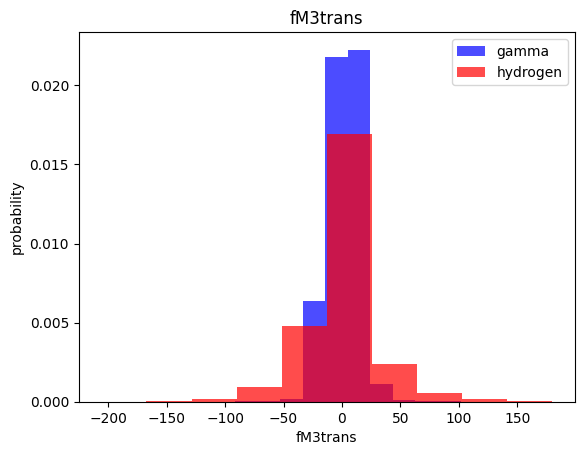

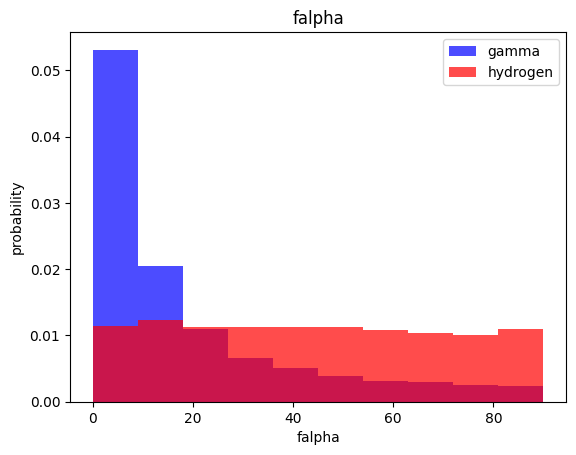

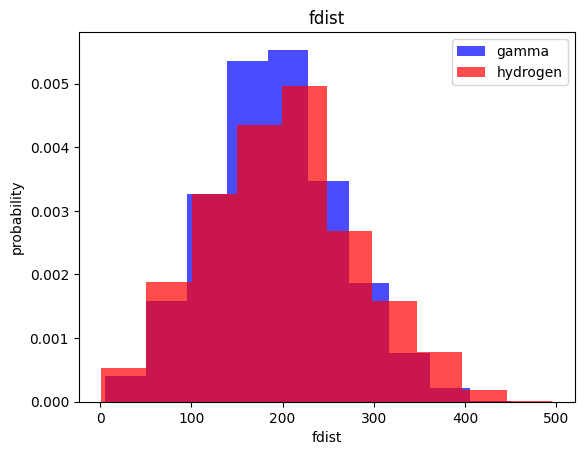

In [8]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label],color='blue',label='gamma',alpha =0.7,density=True)
  plt.hist(df[df['class']==0][label],color='red',label='hydrogen',alpha =0.7,density=True)
  plt.title(label)
  plt.ylabel('probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Test, Validation

In [9]:
train, valid, test = np.split(df.sample(frac =1 ), [int(0.6*len(df)),int(0.8*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [10]:
def scale_dataset(dataframe, oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  x=scaler.fit_transform(x)
  if oversample:
    ros = RandomOverSampler()
    x,y =ros.fit_resample(x,y)

  data = np.hstack((x,np.reshape(y,(-1,1))))
  return data,x,y



In [ ]:
train

,flength,fwidth,fsize,fconc,fcon1,fasym,fM3long,fM3trans,falpha,fdist,class
1415,76.6657,19.6882,3.0276,0.2572,0.1581,-59.9645,54.6250,-16.0764,0.4360,270.166,1
9919,64.6200,21.5068,2.9692,0.4605,0.2507,26.4380,45.5527,-13.7209,0.6186,356.707,1
527,18.6774,17.6112,2.3551,0.5077,0.3068,22.6674,-4.1781,-6.7637,8.3828,179.516,1
958,38.7469,24.4913,2.8779,0.2689,0.1384,3.4380,10.2877,17.7093,12.0980,255.460,1
10820,46.7412,22.3069,3.1256,0.2171,0.1127,17.0541,37.6895,18.3464,8.8499,225.908,1
...,...,...,...,...,...,...,...,...,...,...,...
6503,20.1503,12.4859,2.4749,0.4958,0.2697,-2.7652,12.3436,-10.2218,3.0331,163.523,1
3325,30.8784,17.2585,2.7589,0.3693,0.1925,31.0391,19.2528,5.6373,13.7391,186.985,1
5016,110.1600,29.4264,3.5472,0.2164,0.1266,-64.7965,-47.5564,15.8038,1.5291,356.133,1
16886,239.4684,63.4614,3.3129,0.1095,0.0539,-84.3968,-256.0750,-35.9185,83.7129,258.443,0


In [11]:
print(len(train[train['class']==1]))  #gamma

print(len(train[train['class']==0])) #hydrogen

7446
3966


In [12]:
train,x_train, y_train = scale_dataset(train, oversample=True)
valid,x_valid, y_valid = scale_dataset(valid, oversample=False)
test,x_test, y_test = scale_dataset(test, oversample=False)


In [13]:
len(y_train)

14892

In [14]:
sum(y_train==1)

np.int64(7446)

#KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [17]:
y_pred = knn_model.predict(x_test)

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      1309
           1       0.87      0.85      0.86      2495

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



In [19]:
knn_model.score(x_test, y_test)

0.8165089379600421

#Naive Bayes